<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/basic/16_Affine_sorftmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Affine 계층은 
행렬 내적을 가하학에서 어파인 변환 이라고 하고,
어파인 변환을 수행하는 처리를 Affine 계층이라는 이름으로 만든다.
즉, 이전 계층의 모든 뉴련과 연결되어 있어 행렬의 내적(np.dot())을 
사용하여 계산하는 계층/레이어를 Affine 계층 /레이어라 부른다

###ex) 행렬 계산(순전파)
x=np.random.rand(2)

w=np.random.rand(2,3)

b=np.random.rand(3)

Y=np.dot(x,w)+b , Y는 (3,)




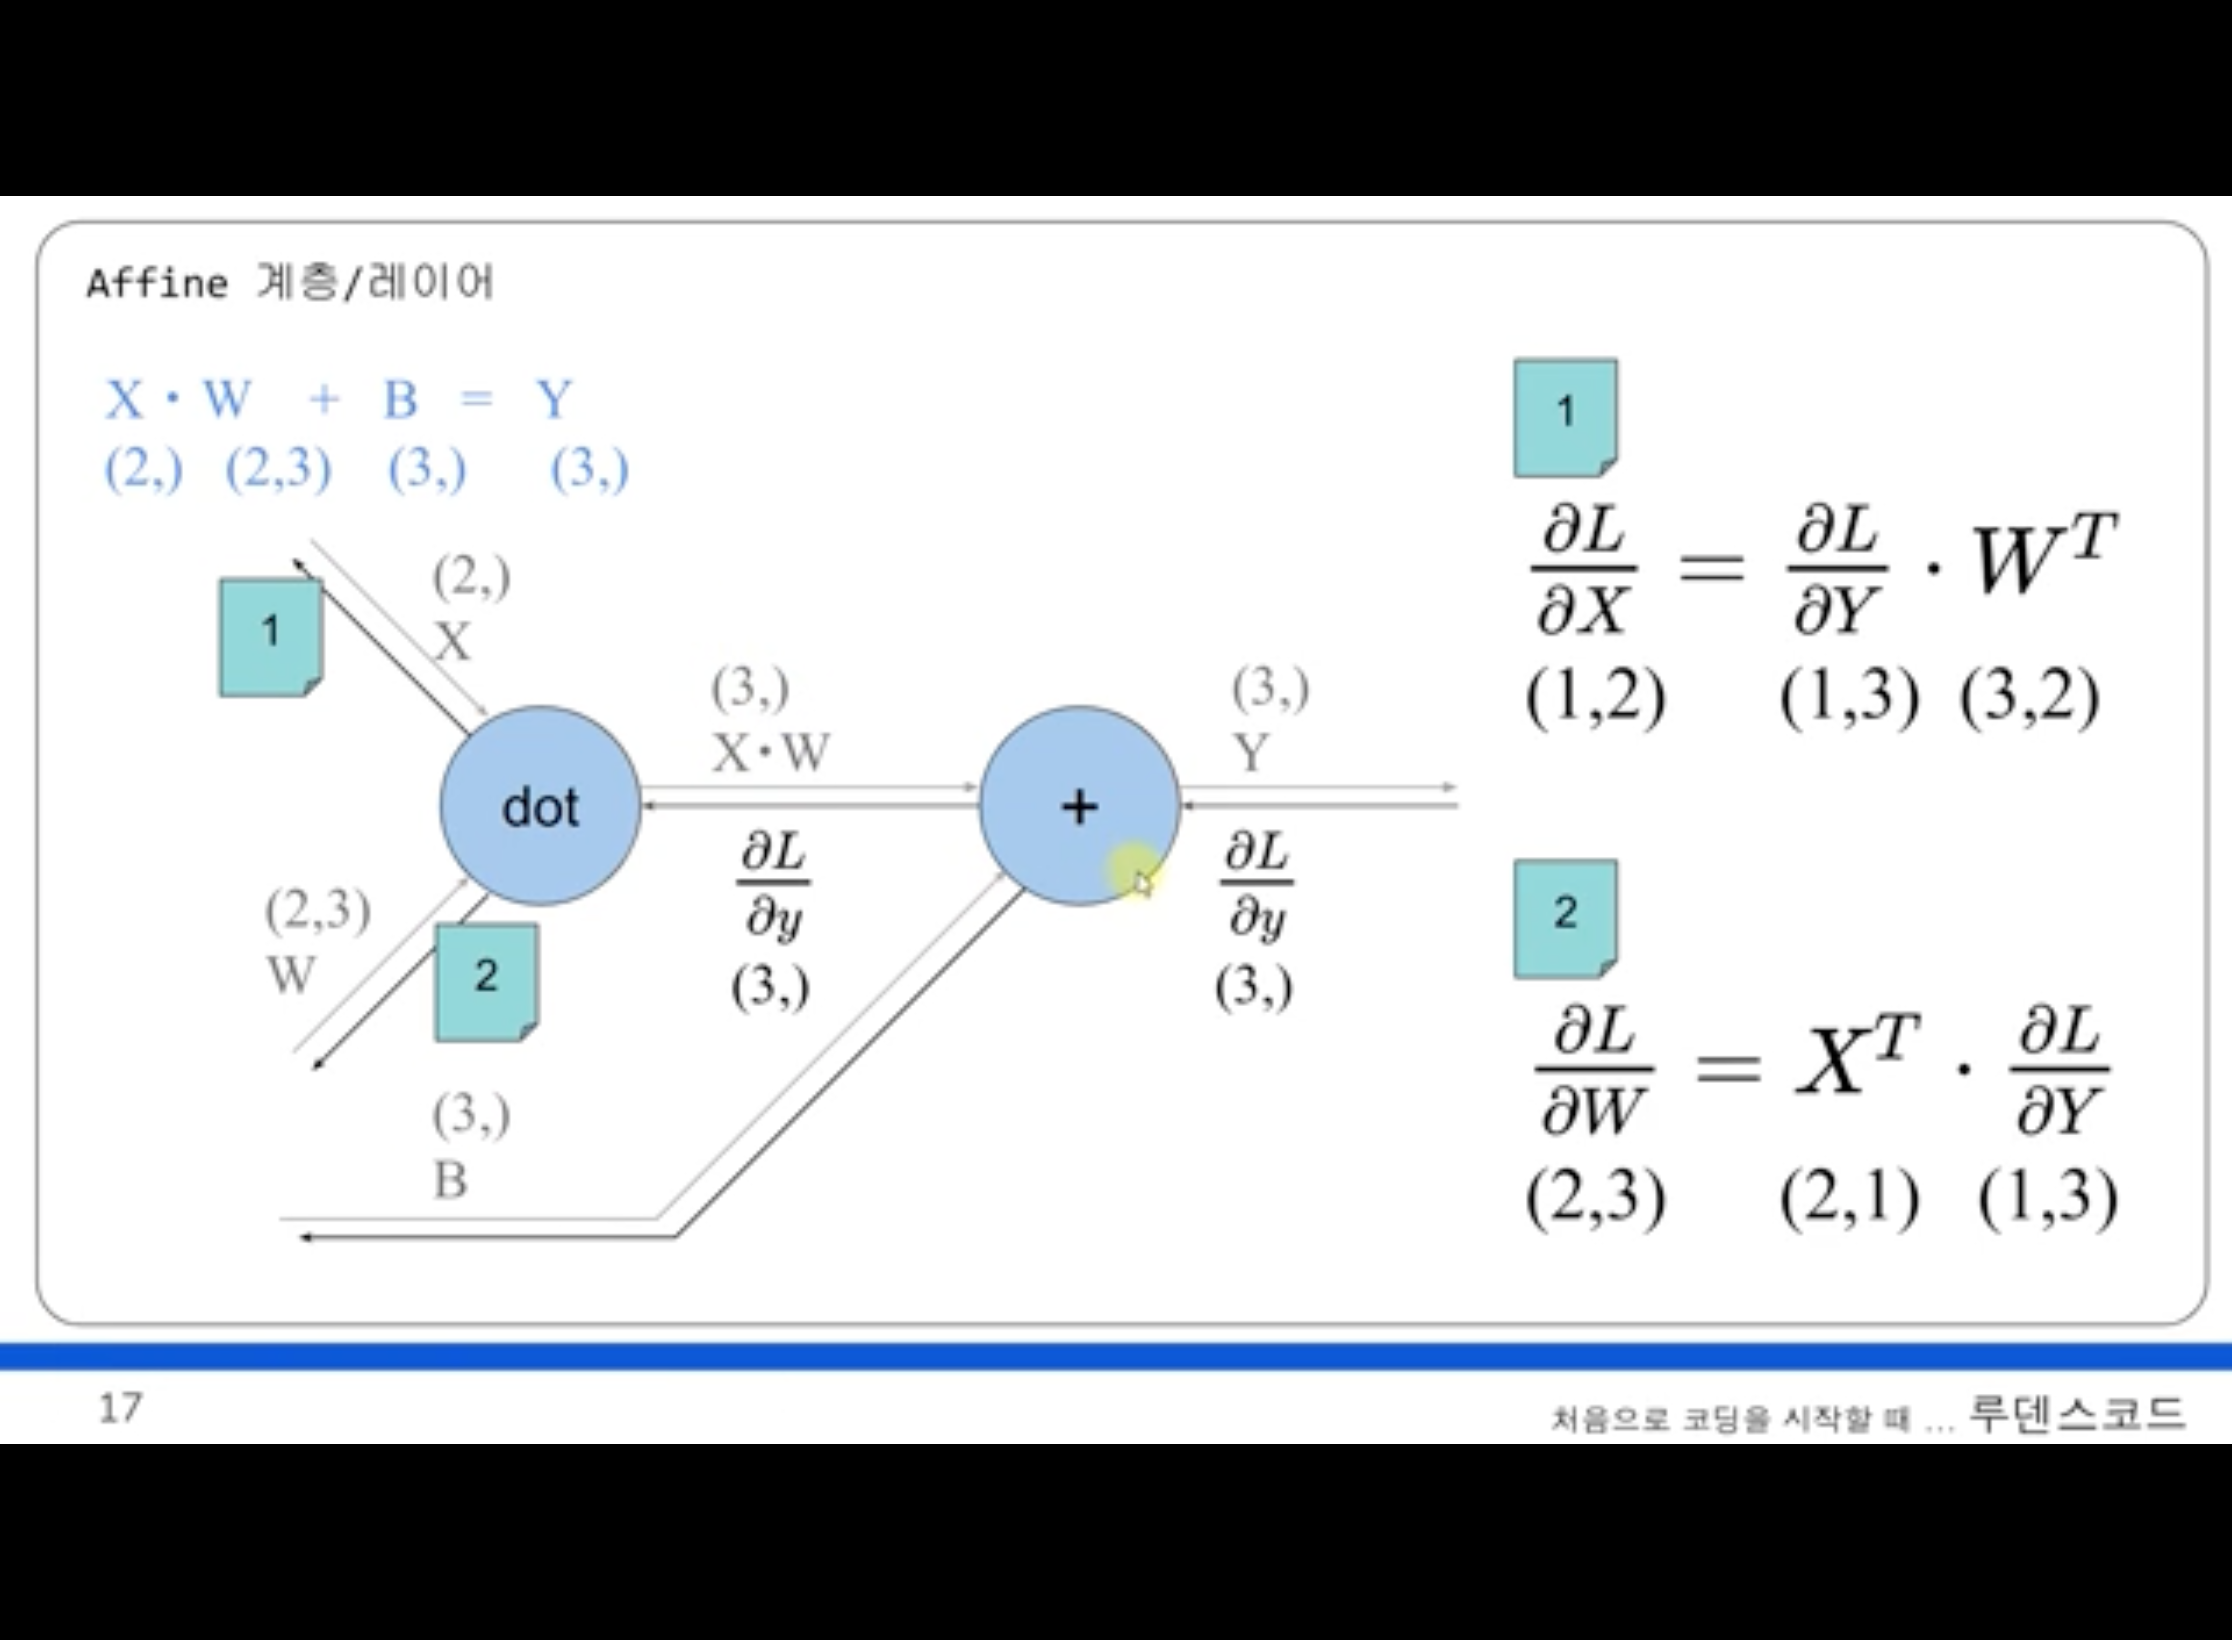

In [2]:
import numpy as np

In [3]:
X_dot_W=np.array([[0,0,0],[10,10,10]])
B=np.array([1,2,3])

print(X_dot_W.shape,B.shape)
#B가 자동으로 (1,3) 으로 변환되어 덧셈
print(X_dot_W+B)

(2, 3) (3,)
[[ 1  2  3]
 [11 12 13]]


In [4]:
dY=np.array([[1,2,3]
            ,[4,5,6]])
db=np.sum(dY,axis=0) 
db_2=np.sum(dY,axis=1) 
#0인경우 열에 대해서 더하기를 실행 3개 출력
#1인경우 가로방향 행으로 더하기를 실행 2개 출력
print(db)
print(db_2)

[5 7 9]
[ 6 15]


In [5]:
class Affine:
  def __init__(self,W,b):
    self.W=W
    self.b=B
    self.x=None
    self.dW=None
    self.db=None
  
  def forword(self,x):
    self.x=x
    out=np.dot(x,self.W)+self.b
    return out

  def backword(self,dout):
    dx=np.dot(dout,self.W.T)
    self.W=np.dot(self.x.T,dout)
    self.b=np.sum(dout,axis=0)
    return dx

In [80]:
x=np.array([[0.1,0.1,0.8]])
W=np.array([[1,2,3],
            [2,3,4],
            [3,4,5]])
b=np.array([1,1,1])

Aff=Affine(W,b)

out=Aff.forword(x)
print(out)



[[3.7 5.7 7.7]]


In [81]:
dout=np.array([[1,0,0]])
doutdata=Aff.backword(dout)
print(doutdata)

#각 자리에 1을 할떄마다 변하는 값

[[1 2 3]]


In [82]:
x=np.array([[1.1,0.1,0.8]])
W=np.array([[1,2,3],
            [2,3,4],
            [3,4,5]])
b=np.array([1,1,1])

Aff=Affine(W,b)

out=Aff.forword(x)
print(out)
#[0]에 +1 시 모든값이 +1 ,+2, +3

[[ 4.7  7.7 10.7]]


In [83]:
x=np.array([[0.1,1.1,0.8]])
W=np.array([[1,2,3],
            [2,3,4],
            [3,4,5]])
b=np.array([1,1,1])

Aff=Affine(W,b)

out=Aff.forword(x)
print(out)
#[1]에 +1 시 모든값이 +2

[[ 5.7  8.7 11.7]]


In [84]:
x=np.array([[0.1,0.1,1.8]])
W=np.array([[1,2,3],
            [2,3,4],
            [3,4,5]])
b=np.array([1,1,1])

Aff=Affine(W,b)

out=Aff.forword(x)
print(out)
#[2]에 +1 시 모든값이 +3

[[ 6.7  9.7 12.7]]


In [85]:
dout=np.array([[1,0,0]])
doutdata=Aff.backword(dout)
print(doutdata)

[[1 2 3]]


#EX)
(a1,a2,a3)>sorftmax>(y1,y2,y3)>CEE(Cross Entropy Error)>(O,O,O) 과 답안(0,0,1)을 비교



*   소프트맥스 함수로 교차엔트로피 오차를 사용하면 역전파가 (y1-t2,y2-t2,y3-t3)로 깔끔해진다
*   이렇게 계산 결과를 단순하고 쉽게 만들기위해 설계된 것이 교차엔트로피 오차이다

